<a href="https://colab.research.google.com/github/Lusanren/CF-Workers-docker.io/blob/main/removing_video_watermark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# 1. 克隆你指定的项目仓库
!git clone https://github.com/YaoFANGUK/video-subtitle-remover.git

# 2. 进入项目目录
%cd video-subtitle-remover

# 3. 安装核心依赖 PaddlePaddle (GPU版本) 和其他库
print("⏳ 开始安装依赖，可能需要几分钟时间...")
!pip install paddlepaddle-gpu -i https://pypi.tuna.tsinghua.edu.cn/simple
!pip install -r requirements.txt -i https://pypi.tuna.tsinghua.edu.cn/simple

print("✅ 环境设置和依赖安装完成！")

fatal: destination path 'video-subtitle-remover' already exists and is not an empty directory.
/content/video-subtitle-remover
⏳ 开始安装依赖，可能需要几分钟时间...
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Ignoring onnxruntime-directml: markers 'sys_platform == "win32"' don't match your environment
✅ 环境设置和依赖安装完成！


In [9]:
from google.colab import files
import os

# --- 从本地电脑上传 (适用于小文件) ---
print("请选择你的视频文件上传...")
uploaded = files.upload()
video_path = list(uploaded.keys())[0]
print(f"\n✅ 视频 '{video_path}' 上传成功！")

请选择你的视频文件上传...


Saving 1.mp4 to 1.mp4

✅ 视频 '1.mp4' 上传成功！


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35831 (\N{CJK UNIFIED IDEOGRAPH-8BF7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20987 (\N{CJK UNIFIED IDEOGRAPH-51FB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  fig.canvas.print

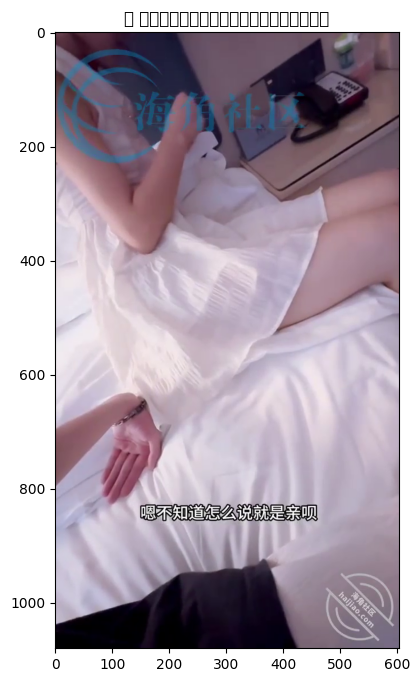

In [10]:
import cv2
import matplotlib.pyplot as plt

cap = cv2.VideoCapture(video_path)

# 设置读取第 50 帧【从 0 开始计数，水印看不清楚时可调整这里】
cap.set(cv2.CAP_PROP_POS_FRAMES, 50)

ret, frame = cap.read()
cap.release()

if not ret:
    print("❌ 无法读取第 50 帧，请检查视频长度是否足够")
else:
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    coords = []

    def onclick(event):
        x, y = int(event.xdata), int(event.ydata)
        coords.append((x, y))
        print(f"📍 你点击的位置是: ({x}, {y})")
        if len(coords) == 2:
            print(f"\n✅ 得到矩形区域坐标：左上角 {coords[0]}，右下角 {coords[1]}")

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.imshow(frame_rgb)
    cid = fig.canvas.mpl_connect('button_press_event', onclick)
    plt.title("💡 请点击图像左上角和右下角来标注水印区域")
    plt.show()


In [ ]:
# --- ‼️ 请在这里填入你刚刚记录的坐标 ---

# 区域左上角的坐标 (对应 xmin, ymin)
xmin = 270  # 替换成你记录的左上角 x 坐标
ymin = 10  # 替换成你记录的左上角 y 坐标

# 区域右下角的坐标 (对应 xmax, ymax)
xmax = 490 # 替换成你记录的右下角 x 坐标
ymax = 65 # 替换成你记录的右下角 y 坐标

# 组合成程序需要的格式：(ymin, ymax, xmin, xmax)
subtitle_area = (936, 1074, 468, 594)

print(f"✅ 成功设置去除区域，坐标为 (ymin, ymax, xmin, xmax): {subtitle_area}")

In [ ]:
import os
import sys

# 将项目根目录添加到系统路径，这样才能正确导入 backend/main.py
sys.path.insert(0, os.path.abspath('.'))

# 从后端模块导入核心的 SubtitleRemover 类
from backend.main import SubtitleRemover

print("🚀 开始处理视频，根据视频时长和GPU性能，这可能需要一些时间...")
print(f"输入视频: {video_path}")
print(f"处理区域: {subtitle_area}")

# 1. 创建 SubtitleRemover 实例
#    - 第一个参数是视频路径
#    - 第二个参数是我们刚才定义好的区域坐标
#    - 第三个参数 preview 设置为 False，因为在 Colab 中无法实时预览
remover = SubtitleRemover(video_path, subtitle_area, False)

# 2. 运行处理程序
remover.run()

print("\n\n✅ 视频处理任务完成！")